In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'

suffix = 'ABCD_VR1_goodvtx_v11_noNJetCut_ABCDscan'

In [4]:
# Signal
#sig_histo = util.load(f'{prefix}/signal_{suffix}.coffea')[0]

In [5]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

In [6]:
# Data
data_histo = util.load(f'{prefix}/data_{suffix}.coffea')[0]

## Signal

In [6]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [7]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections',
 'NJet > 2',
 'n(good vertex) > 0',
 'Leading jet pT > 80 GeV',
 'Leading jet |eta| < 2.4',
 'dPhi(MET,leading jet) > 2.0',
 'dPhi(MET,all jets) > 0.75',
 'SSSF',
 'theta < 1.22 rad',
 'BDT']

In [8]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [9]:
table = eff_cutflow
table.columns = cutnames

In [10]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'VR1_Signal_ctau-{int(ct)}_samples_Efficiency'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//VR1_Signal_ctau-1_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//VR1_Signal_ctau-10_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//VR1_Signal_ctau-100_samples_Efficiency.csv


In [11]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [12]:
table = cts_cutflow
table.columns = cutnames

In [13]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,NJet > 2,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",SSSF,theta < 1.22 rad,BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.1691,0.8247,0.3362,0.3362,0.3175,0.3175,0.2101,0.0093,0.0047,0.0016
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,156.9315",16.6490,7.8474,7.8157,7.3712,7.3712,4.4811,0.0635,0.0317,0.0000
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"1,457.7156",20.6977,9.1125,9.1125,8.5214,8.5214,5.8006,0.3565,0.1187,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,74.7132,1.4474,0.5489,0.5489,0.5240,0.5240,0.2869,0.0000,0.0000,0.0000
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"1,964.2733",29.7172,11.7056,11.7056,11.1647,11.1647,7.9218,0.0000,0.0000,0.0000
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"2,725.2304",54.2822,23.5571,23.2585,21.7657,21.7657,11.9222,0.5955,0.2981,0.0000
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,167.4818,3.1011,1.2911,1.2911,1.2911,1.2911,0.7752,0.0000,0.0000,0.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,620.1785",29.7651,5.0631,5.0631,5.0631,5.0631,3.1639,0.0000,0.0000,0.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"33,765.0692",565.9296,106.2094,106.2094,106.2094,106.2094,70.7815,0.0000,0.0000,0.0000
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,"4,184.6540",60.9035,26.1662,26.1662,25.2167,25.2167,14.2715,0.0000,0.0000,0.0000


In [14]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'VR1_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//VR1_Signal_ctau-1_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//VR1_Signal_ctau-10_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//VR1_Signal_ctau-100_samples_EventCount_Weighted.csv


In [15]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [16]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [17]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'VR1_Signal_ctau-{int(ct)}_samples_Raw'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//VR1_Signal_ctau-1_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//VR1_Signal_ctau-10_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//VR1_Signal_ctau-100_samples_Raw.csv


['Preselections', 'NJet > 2', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'SSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p1_ct_1_m5to40.png


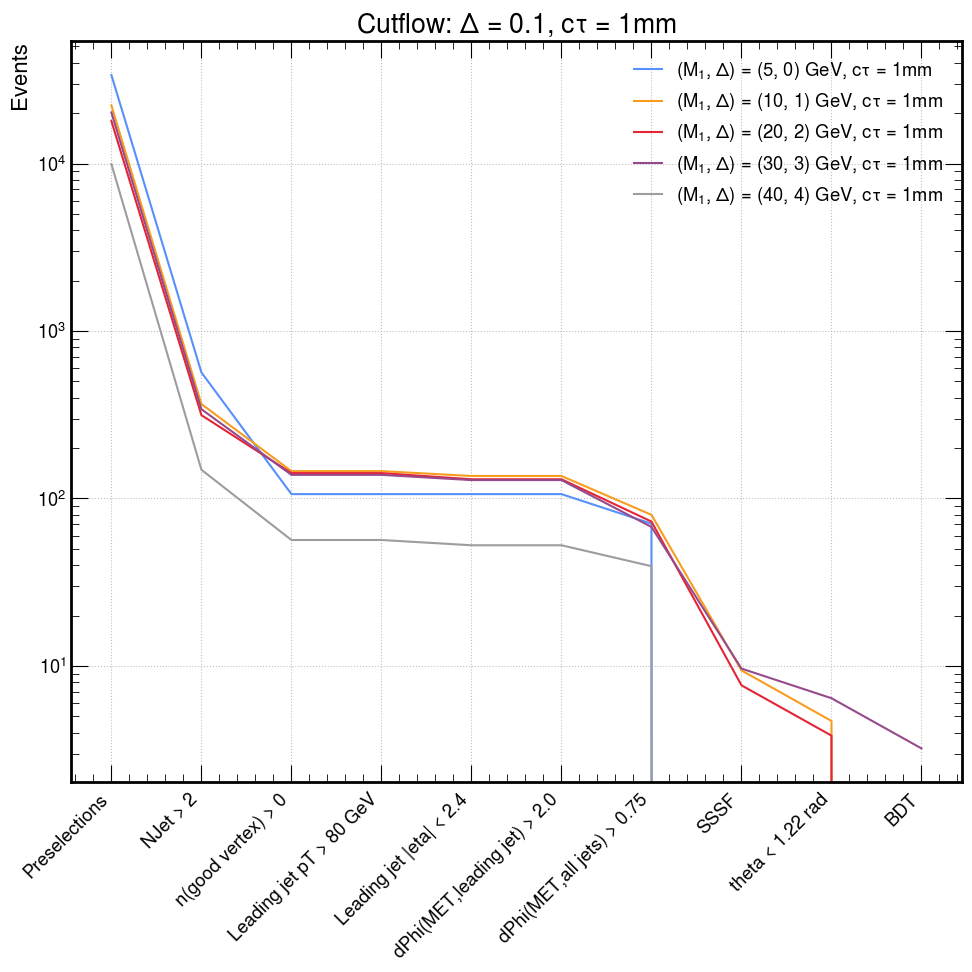

['Preselections', 'NJet > 2', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'SSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p1_ct_10_m5to40.png


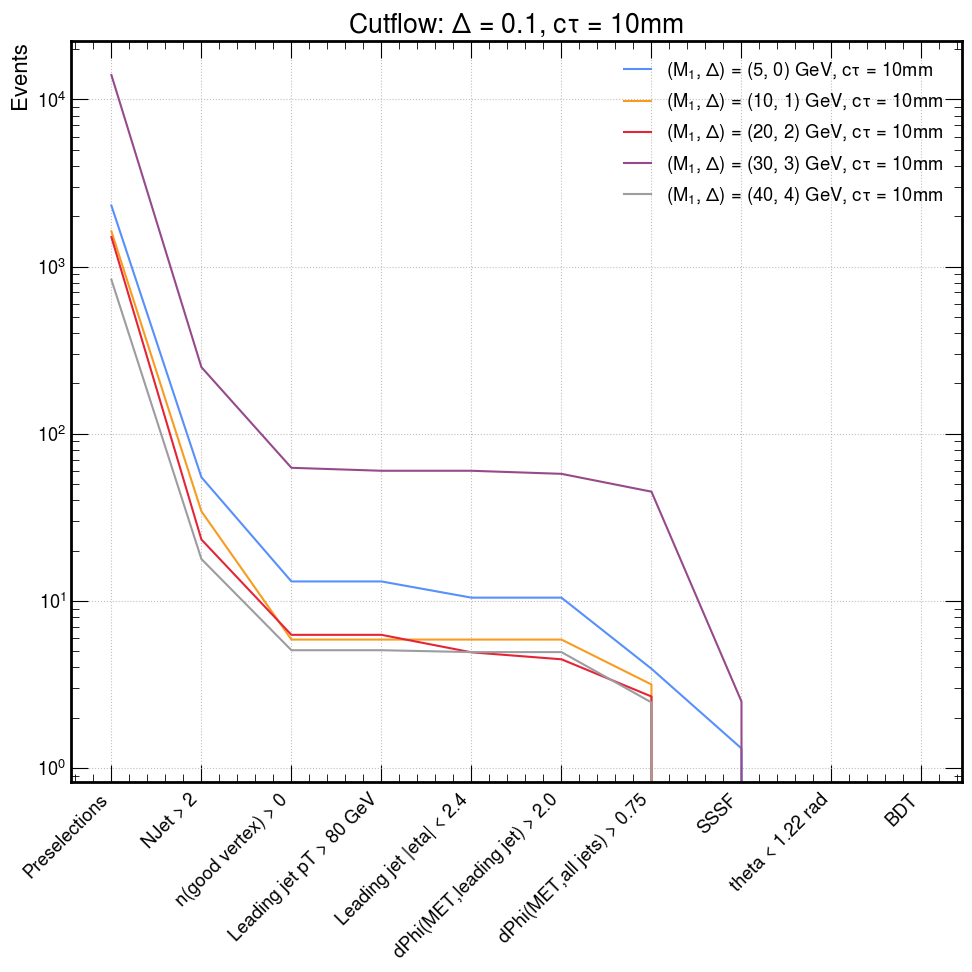

['Preselections', 'NJet > 2', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'SSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p1_ct_100_m5to40.png


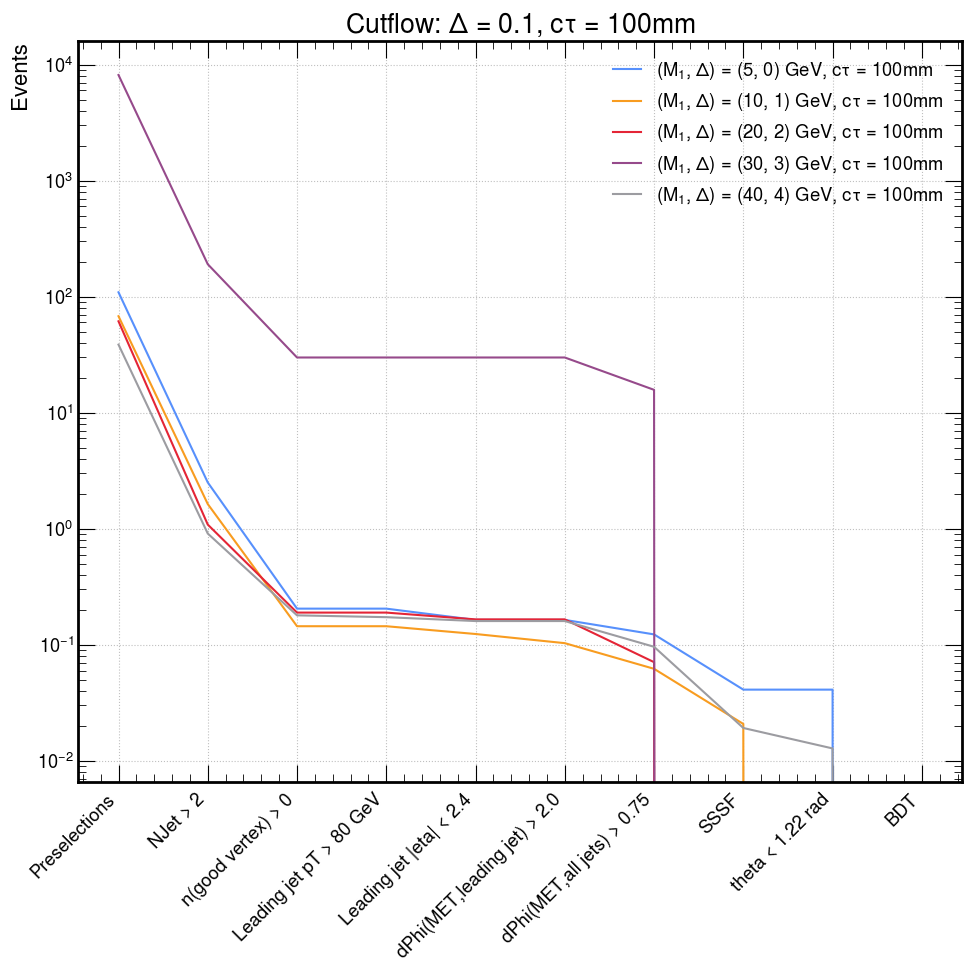

['Preselections', 'NJet > 2', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'SSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p2_ct_1_m5to40.png


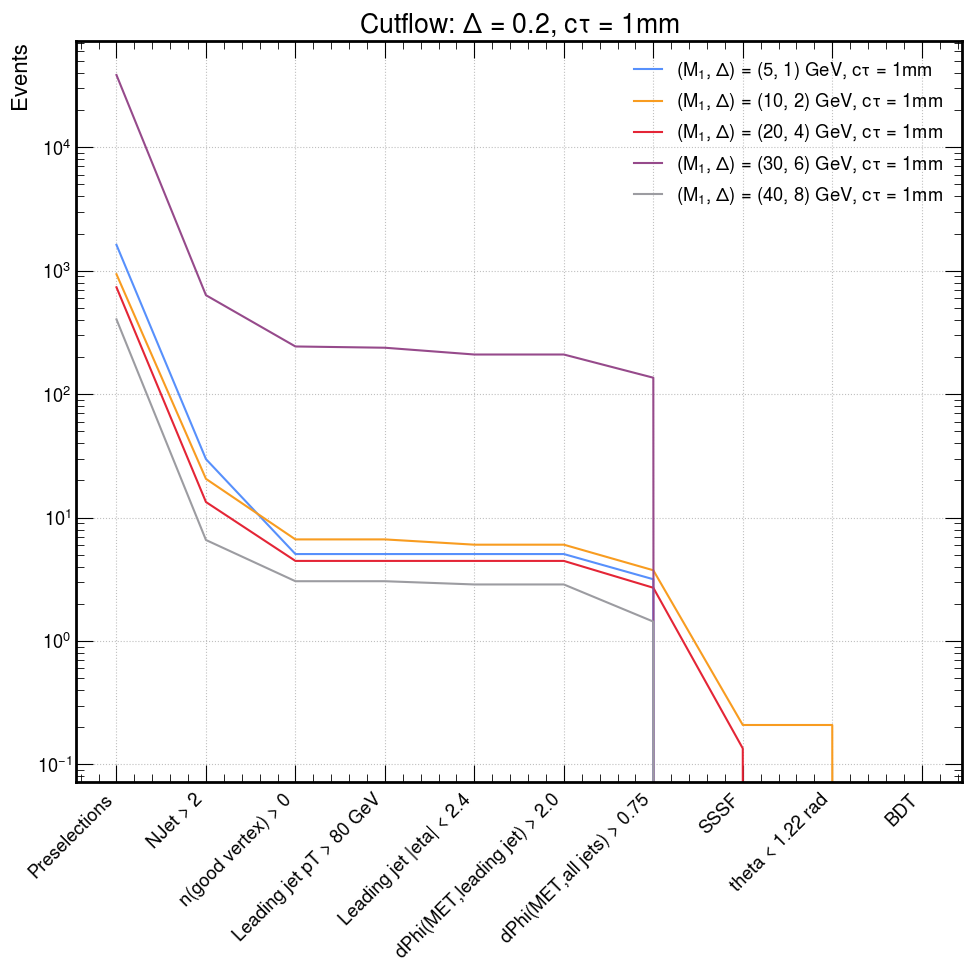

['Preselections', 'NJet > 2', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'SSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p2_ct_10_m5to40.png


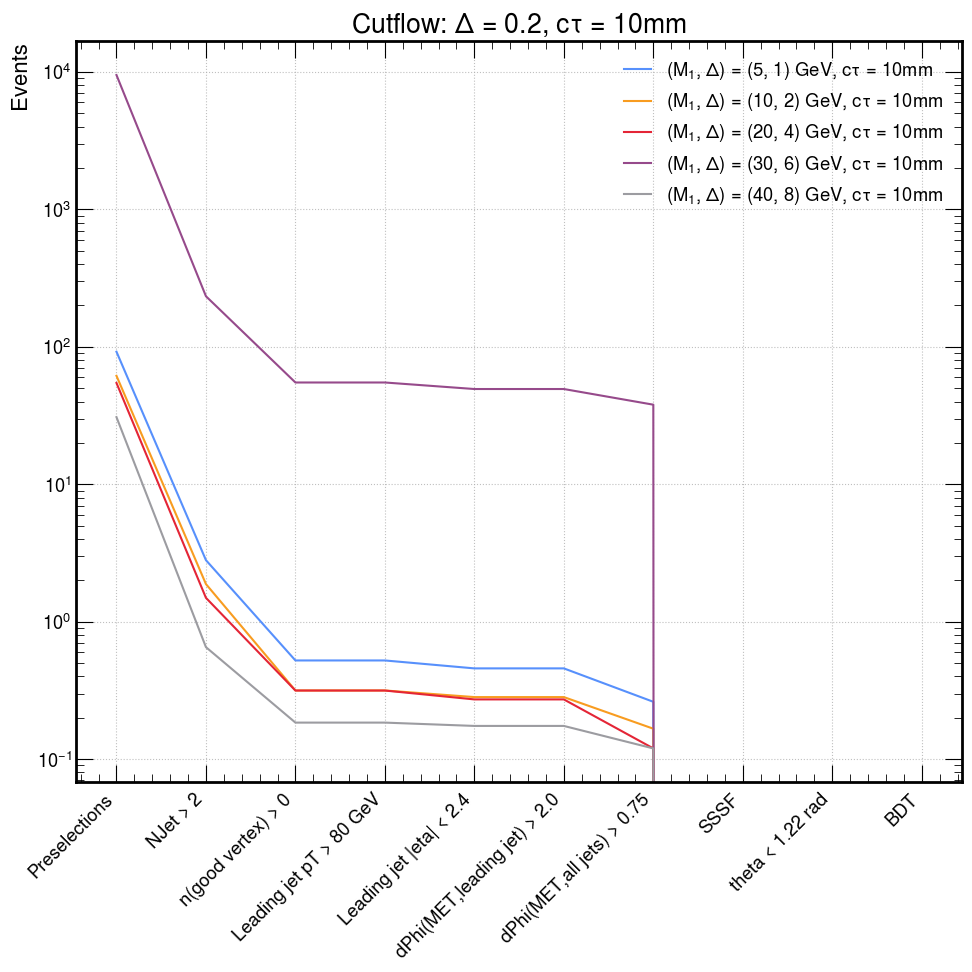

['Preselections', 'NJet > 2', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'SSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p2_ct_100_m5to40.png


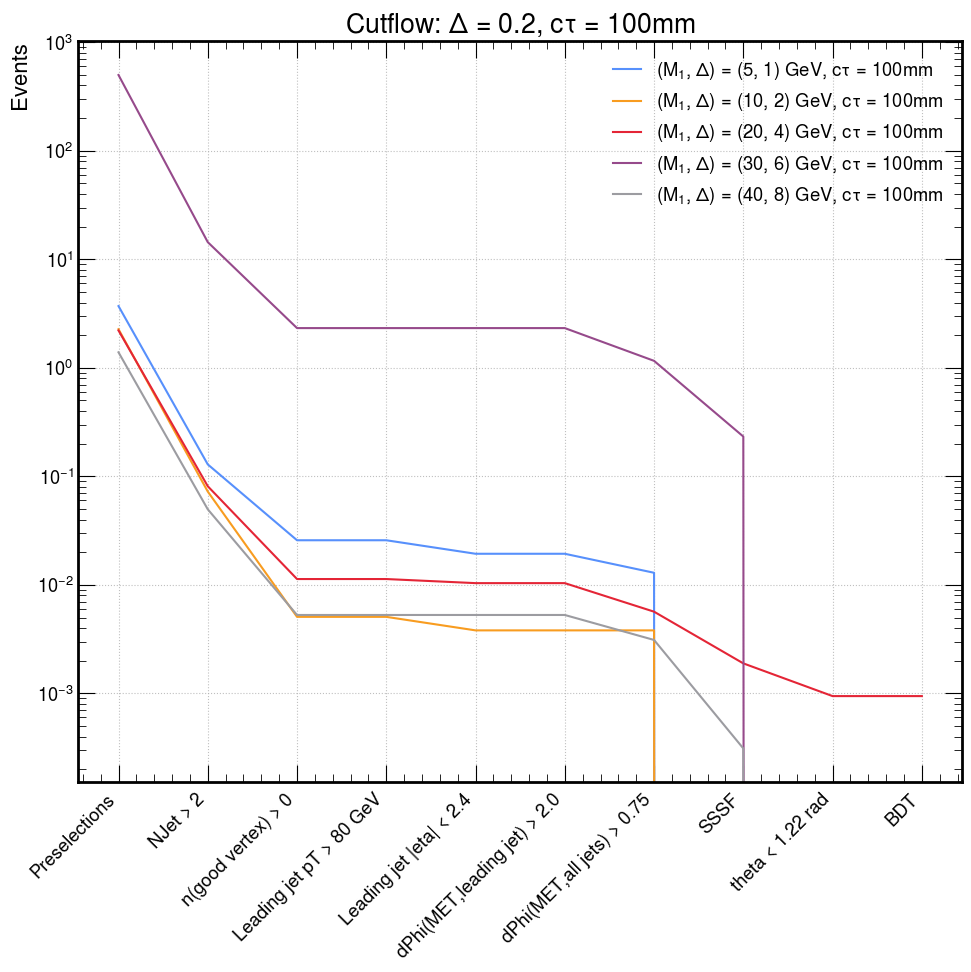

In [19]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_VR1_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

['Preselections', 'NJet > 2', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'SSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p1_ct_1_m50to100.png


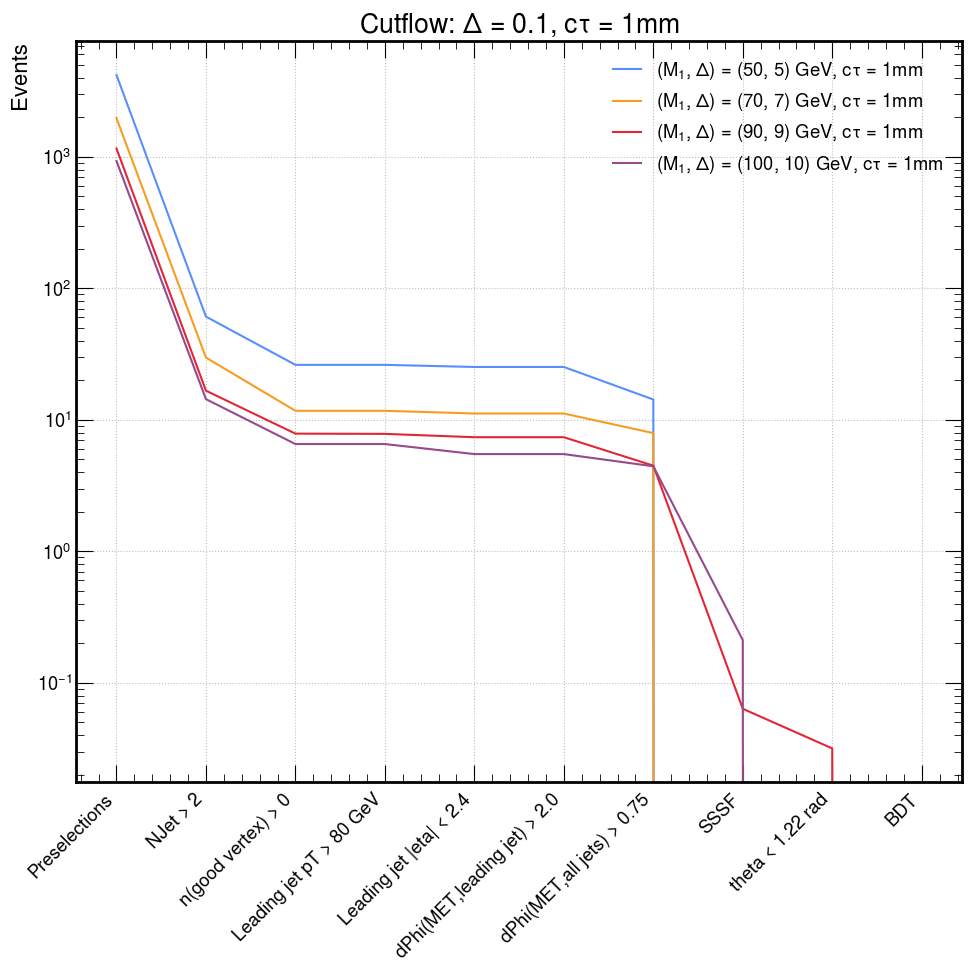

['Preselections', 'NJet > 2', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'SSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p1_ct_10_m50to100.png


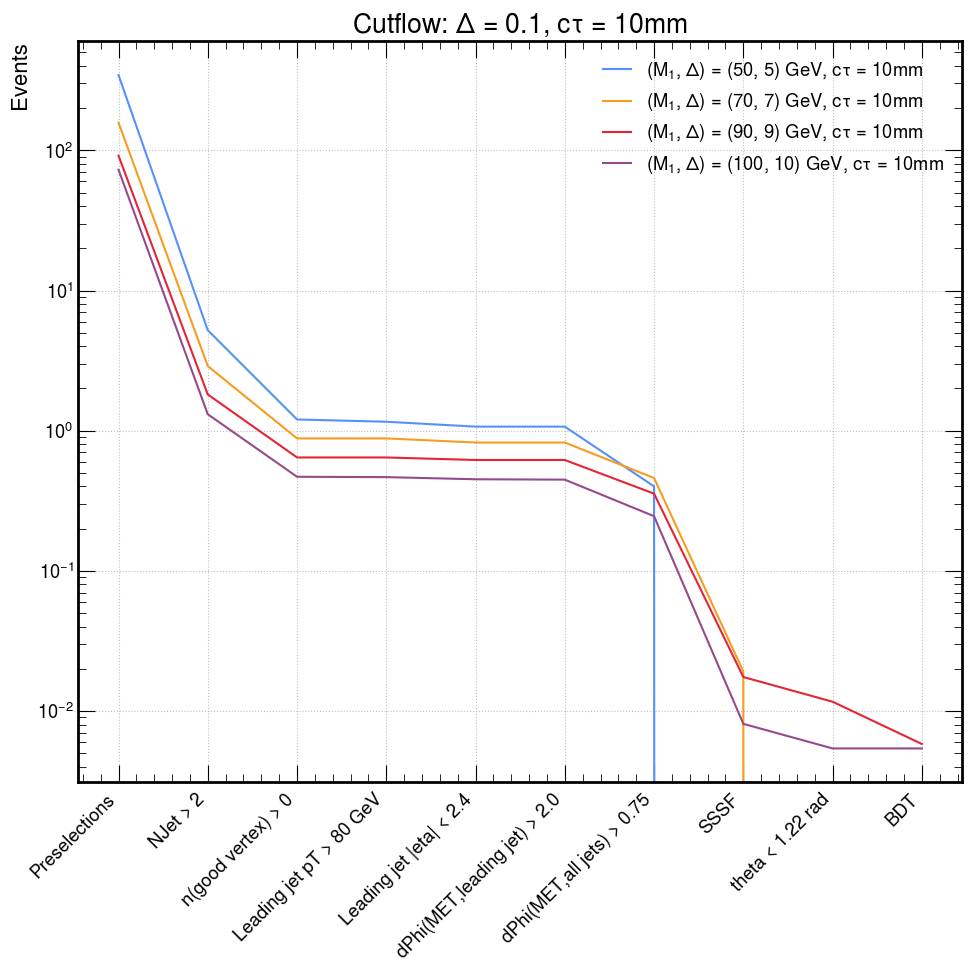

['Preselections', 'NJet > 2', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'SSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p1_ct_100_m50to100.png


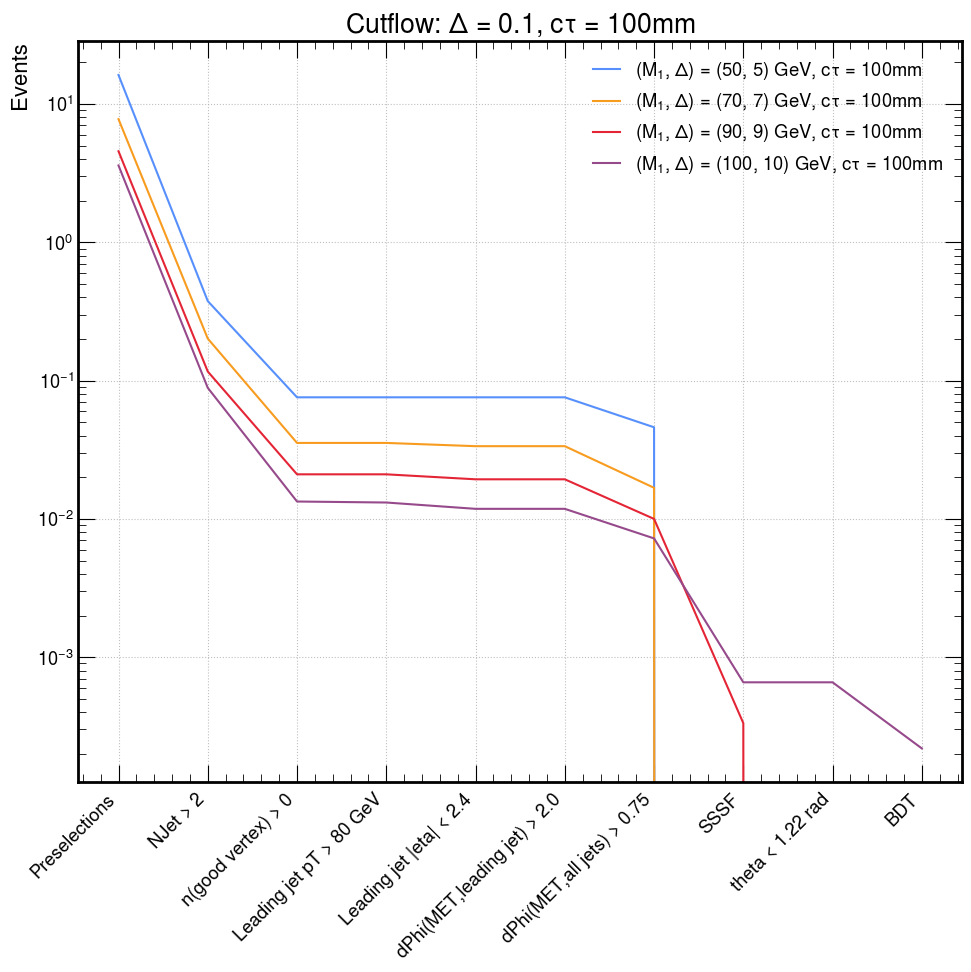

['Preselections', 'NJet > 2', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'SSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p2_ct_1_m50to100.png


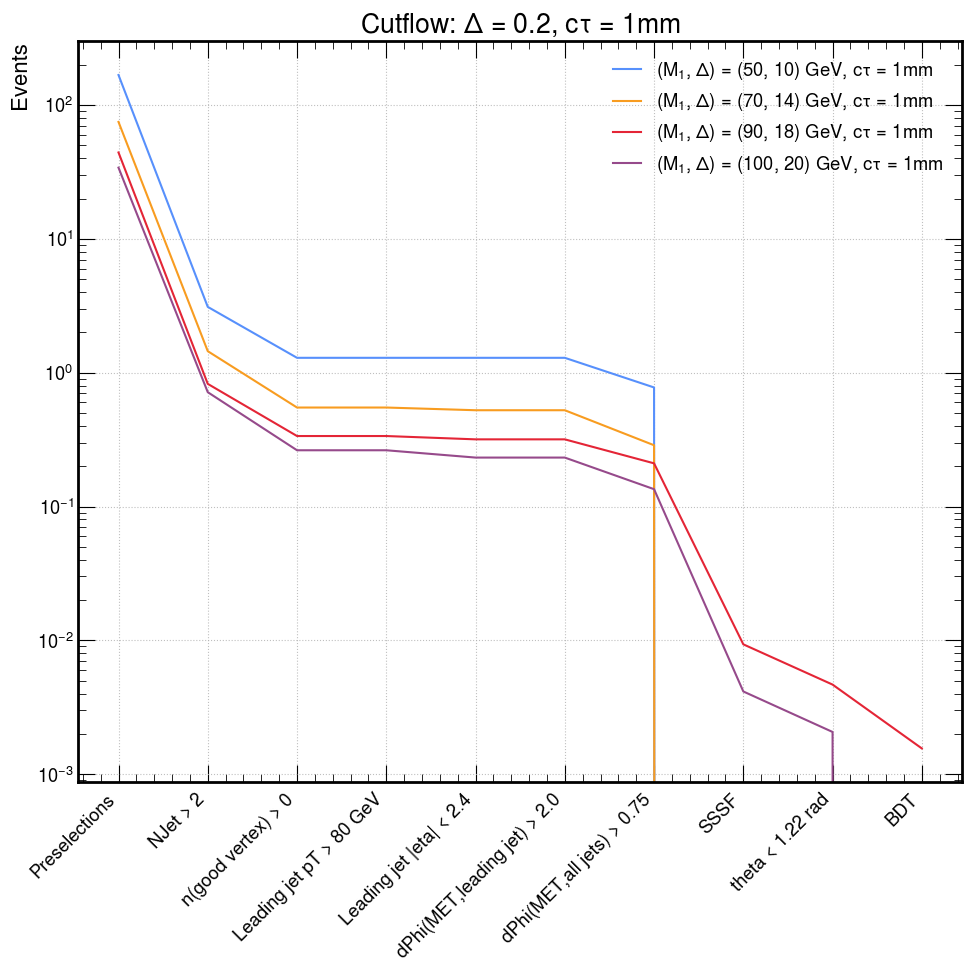

['Preselections', 'NJet > 2', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'SSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p2_ct_10_m50to100.png


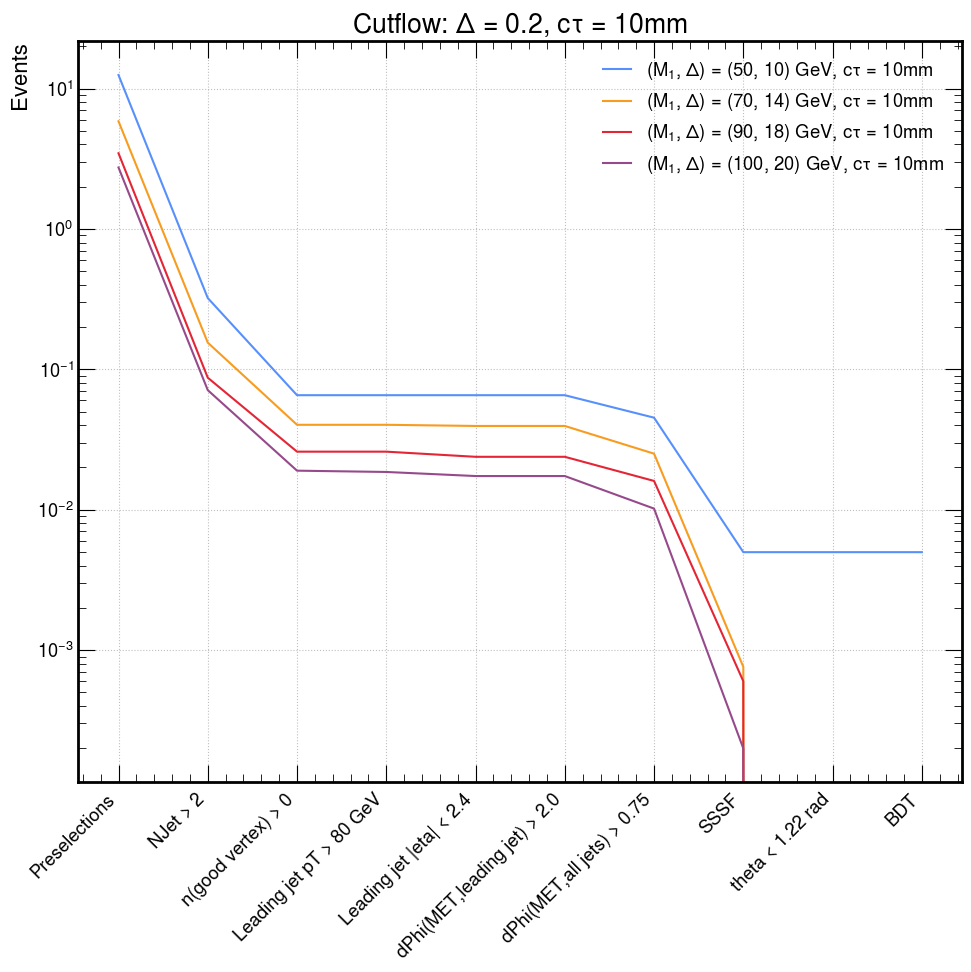

['Preselections', 'NJet > 2', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'SSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR1_signal_delta_0p2_ct_100_m50to100.png


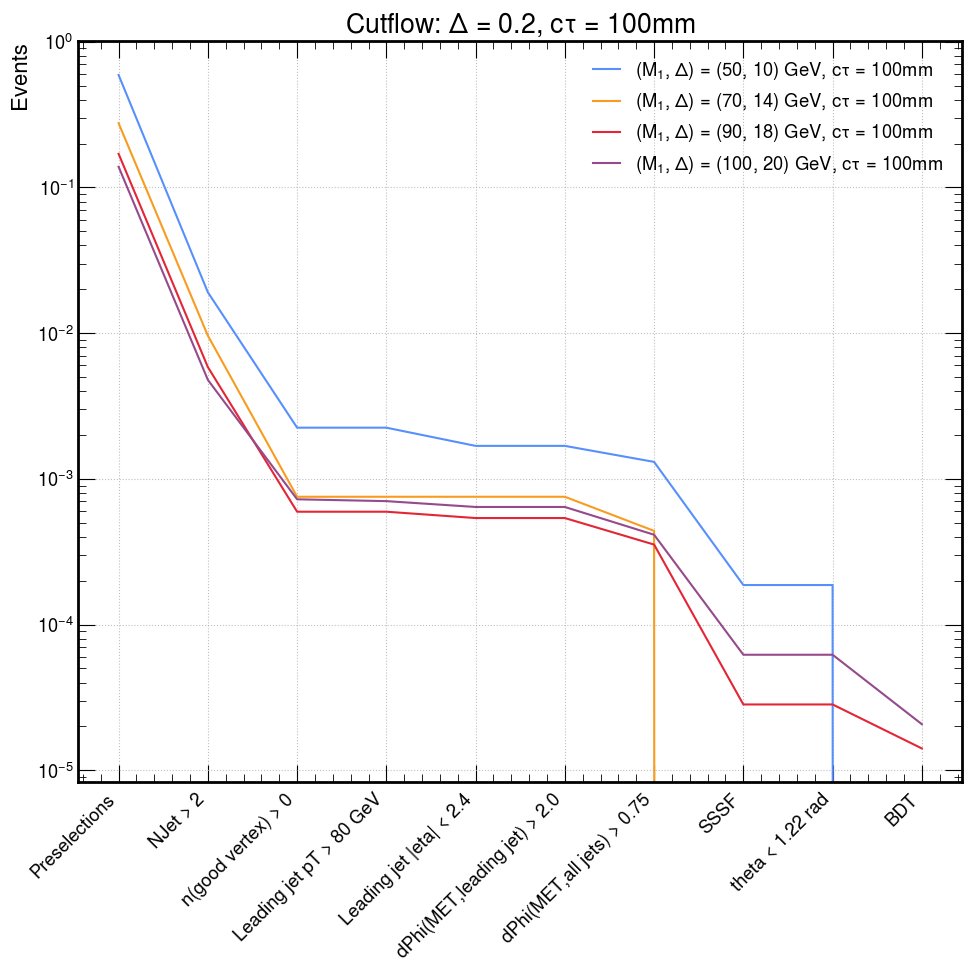

In [20]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_VR1_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Background

In [7]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",SSSF,theta < 1.22 rad,BDT
Top,0.00039885,0.00003591,0.00003455,0.00003158,0.00003081,0.00002138,0.00000809,0.00000362,0.00000001
WJets,0.00101318,0.00005685,0.00005610,0.00005327,0.00005245,0.00004262,0.00002034,0.00000898,0.00000002
ZGamma,0.00032468,0.00002478,0.00002220,0.00002116,0.00002078,0.00001821,0.00000577,0.00000246,0.00000000
QCD,0.00000249,0.00000006,0.00000006,0.00000005,0.00000005,0.00000000,0.00000000,0.00000000,0.00000000
Multiboson,0.00065832,0.00005269,0.00004789,0.00004459,0.00004295,0.00003536,0.00001091,0.00000512,0.00000000
DY,0.00018701,0.00001865,0.00001853,0.00001773,0.00001737,0.00001297,0.00000274,0.00000115,0.00000001
ZJets,0.00242159,0.00011099,0.00010970,0.00010353,0.00010212,0.00008727,0.00004126,0.00001710,0.00000011
Total,0.00001696,0.00000090,0.00000088,0.00000083,0.00000082,0.00000062,0.00000028,0.00000012,0.00000000


In [8]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/ABCD_VR1_goodvtx_v11_noNJetCut_ABCDscan/Cutflow/Efficiency//Background_Efficiency.csv


In [9]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

In [10]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/ABCD_VR1_goodvtx_v11_noNJetCut_ABCDscan/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [11]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",SSSF,theta < 1.22 rad,BDT
Top,703976,65598,62668,57379,55066,37016,13834,6205,13
WJets,1177020,48102,47768,46389,43556,27102,13065,5815,15
ZGamma,6506,517,478,450,432,331,120,50,0
QCD,31490,540,540,534,492,7,5,4,0
Multiboson,25187,2178,1949,1833,1713,1361,424,207,0
DY,296131,23705,23664,23333,21183,9130,1724,737,3
ZJets,738994,26075,25908,24864,23939,16812,7965,3355,19
Total,2979304,166715,162975,154782,146381,91759,37137,16373,50


In [21]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

In [13]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/ABCD_VR1_goodvtx_v11_noNJetCut_ABCDscan/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [14]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 8.79


In [22]:
bkg_cts_df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",SSSF,theta < 1.22 rad,BDT
Top,"26,175","2,356","2,267","2,072","2,022","1,403",531,237,0
WJets,"214,692","12,047","11,888","11,288","11,115","9,030","4,310","1,903",5
ZGamma,"1,665",127,114,109,107,93,30,13,0
QCD,"53,432","1,230","1,230","1,118","1,070",33,17,9,0
Multiboson,"4,588",367,334,311,299,246,76,36,0
DY,"5,819",580,577,552,540,404,85,36,0
ZJets,"63,746","2,922","2,888","2,725","2,688","2,297","1,086",450,3
Total,"370,118","19,630","19,296","18,175","17,842","13,508","6,135","2,684",9


In [15]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-1]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-1]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,Top,WJets,ZGamma,QCD,Multiboson,DY,ZJets,Total
Weighted Counts,0.47,5.05,0.00,0.00,0.00,0.32,2.95,8.79
Raw Counts,13.00,15.00,0.00,0.00,0.00,3.00,19.00,50.00


In [16]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-3]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-3]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,Top,WJets,ZGamma,QCD,Multiboson,DY,ZJets,Total
Weighted Counts,530.72,"4,309.93",29.59,17.43,76.02,85.23,"1,086.08","6,135.00"
Raw Counts,"13,834.00","13,065.00",120.00,5.00,424.00,"1,724.00","7,965.00","37,137.00"


Saved: ./plots/ABCD_VR1_goodvtx_v11_noNJetCut_ABCDscan/cutflow//Cutflow_background.png


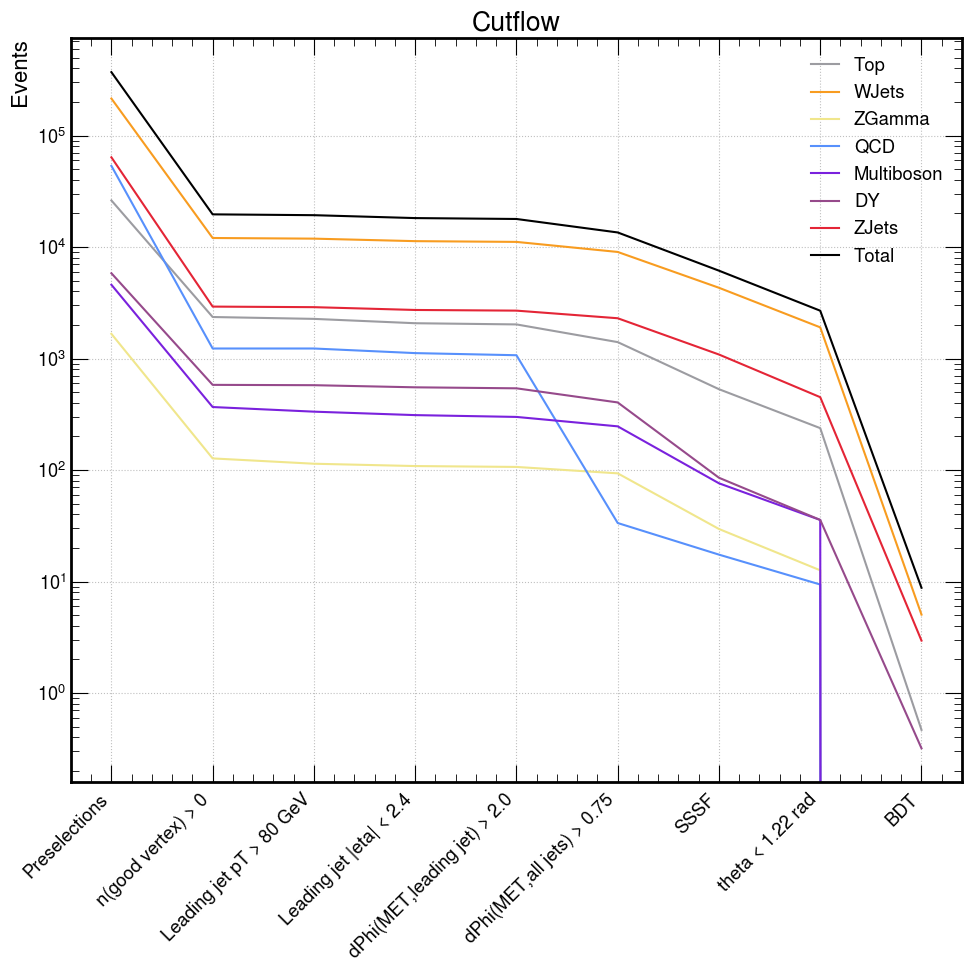

In [17]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

Saved: ./plots/ABCD_VR1_goodvtx_v11_noNJetCut_ABCDscan/cutflow//Cutflow_background.png


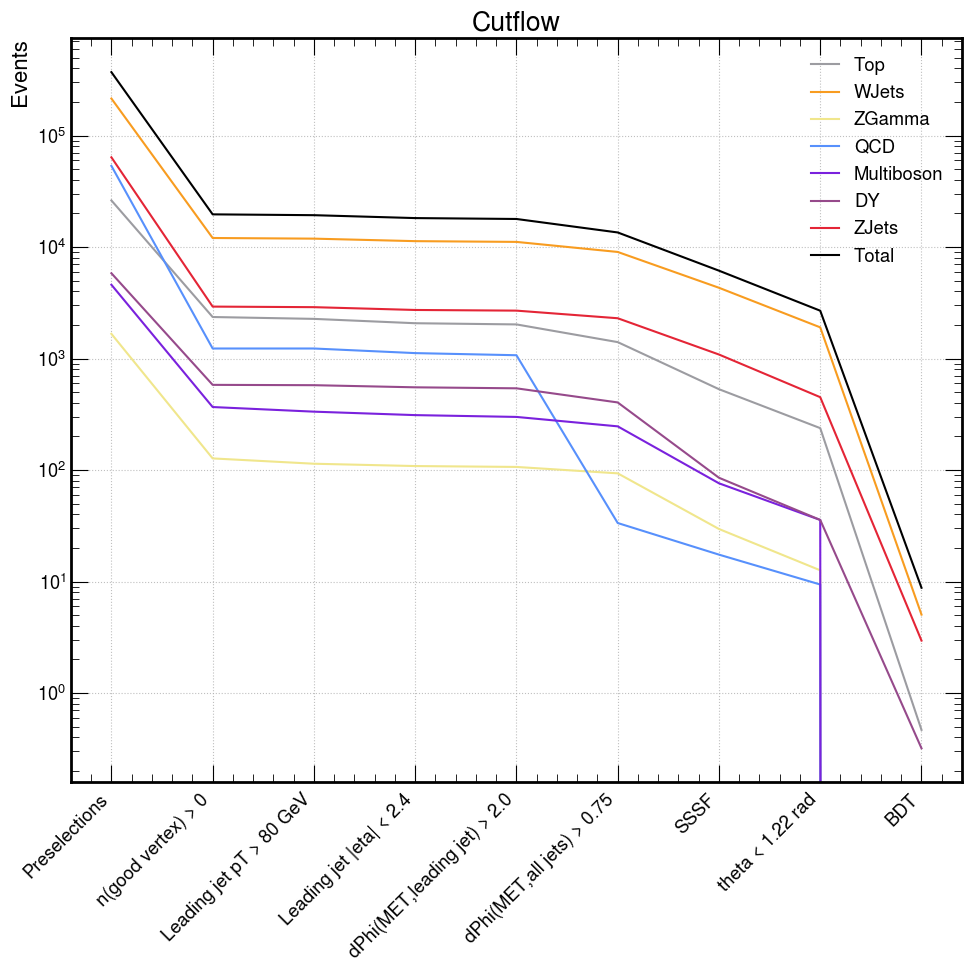

In [18]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

## Data

In [19]:
pd.options.display.float_format = '{:,.1f}'.format
data_cts_df = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')
data_cts_df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",SSSF,theta < 1.22 rad,BDT
data_2018_Data_MET_UL18_MET_Run2018D,"364,388.0","19,073.0","18,753.0","13,101.0","12,835.0","9,292.0","4,345.0","1,907.0",6.0
data_2018_Data_MET_UL18_MET_Run2018C,"82,311.0","4,381.0","4,306.0","2,861.0","2,813.0","2,075.0",952.0,433.0,1.0
data_2018_Data_MET_UL18_MET_Run2018B,"63,816.0","4,137.0","4,065.0","2,636.0","2,577.0","1,915.0",885.0,402.0,0.0
data_2018_Data_MET_UL18_MET_Run2018A,"125,215.0","7,953.0","7,833.0","4,807.0","4,687.0","3,417.0","1,542.0",679.0,3.0
Total,"635,730.0","35,544.0","34,957.0","23,405.0","22,912.0","16,699.0","7,724.0","3,421.0",10.0


In [20]:
pd.options.display.float_format = '{:,.1f}'.format

data_composition = pd.DataFrame(data_cts_df[data_cts_df.columns.values[-1]]).transpose()

data_composition = data_composition.rename(index={data_cts_df.columns.values[-1]: 'Data Yield'})
data_composition = data_composition.rename(columns={'data_2018_Data_MET_UL18_MET_Run2018C': 'Run2018C', \
                                                   'data_2018_Data_MET_UL18_MET_Run2018B': 'Run2018B', \
                                                    'data_2018_Data_MET_UL18_MET_Run2018A': 'Run2018A', \
                                                    'data_2018_Data_MET_UL18_MET_Run2018D': 'Run2018D'
                                                   })

data_composition = data_composition.reindex(sorted(data_composition.columns), axis=1)

data_composition

,Run2018A,Run2018B,Run2018C,Run2018D,Total
Data Yield,3.0,0.0,1.0,6.0,10.0
